# Поправить метки semi supervised


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os
from io import BytesIO
from PIL import Image
import cv2

In [3]:
df = pd.read_csv("Train.csv")
df.head()

,UID,growth_stage,label_quality
0,nwuCTQKz,4,2
1,NVGUOzWu,1,1
2,1IYVvHwA,1,1
3,8OEdWwmU,1,1
4,oc5iO04j,1,1


In [4]:
pd.read_csv("small_test.csv").describe()

,growth_stage,label_quality
count,2844.000000,2844.0
mean,3.859705,2.0
std,1.445337,0.0
min,1.000000,2.0
25%,3.000000,2.0
50%,4.000000,2.0
75%,4.000000,2.0
max,7.000000,2.0


In [5]:
#new_df = pd.read_csv("full_data_rn34_22.csv").append(pd.read_csv("predict_rn50_24.csv"))
#new_df = pd.read_csv("full_data_rn34_22.csv") #last good result
new_df = pd.read_csv("full_data_rn34_01.csv")

print(new_df.shape)
pred = []
for g in new_df.groupby("UID"):
    p = g[1]["pred"]**2
    std =  g[1]["pred"].std()
    #print(g[1]["UID"].unique()[0])
    pred.append([g[1]["UID"].unique()[0], g[1]["img_name"].unique()[0], 
                 np.max([np.min([np.sqrt(p.mean()), 6]),0])+1, std])
new_df = pd.DataFrame(data = pred, columns = ["UID", "img_name", "pred", "std"])

new_df.head()

(160425, 3)


,UID,img_name,pred,std
0,01AJUu7l,01AJUu7l.jpeg,3.890042,0.358025
1,01B4CV3K,01B4CV3K.jpeg,2.192580,0.273383
2,02R9pCXz,02R9pCXz.jpeg,5.854731,0.411390
3,02XgtYwT,02XgtYwT.jpeg,6.756191,0.070720
4,02hINknf,02hINknf.jpeg,6.382838,0.670843


In [6]:
new_df = new_df.merge(df[["UID", "label_quality", "growth_stage"]], on='UID')
new_df.head(20)

,UID,img_name,pred,std,label_quality,growth_stage
0,01AJUu7l,01AJUu7l.jpeg,3.890042,0.358025,1,7
1,01B4CV3K,01B4CV3K.jpeg,2.192580,0.273383,2,2
2,02R9pCXz,02R9pCXz.jpeg,5.854731,0.411390,1,7
3,02XgtYwT,02XgtYwT.jpeg,6.756191,0.070720,2,7
4,02hINknf,02hINknf.jpeg,6.382838,0.670843,1,5
5,03suVk46,03suVk46.jpeg,3.771892,0.128615,1,2
6,03vQEfIz,03vQEfIz.jpeg,4.088024,0.290139,1,1
7,04J3L9gf,04J3L9gf.jpeg,4.741621,0.187886,1,6
8,04Opjmbk,04Opjmbk.jpeg,3.257702,0.202321,2,3
9,053h7FH8,053h7FH8.jpeg,4.114574,0.092075,1,4


In [7]:
new_df[new_df["label_quality"] == 2][new_df["std"] > 0.2]

<ipython-input-7-52e5a105c233>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df[new_df["label_quality"] == 2][new_df["std"] > 0.2]


,UID,img_name,pred,std,label_quality,growth_stage
1,01B4CV3K,01B4CV3K.jpeg,2.192580,0.273383,2,2
8,04Opjmbk,04Opjmbk.jpeg,3.257702,0.202321,2,3
17,09YsAGWz,09YsAGWz.jpeg,7.000000,0.257644,2,7
28,0EPzRZXt,0EPzRZXt.jpeg,3.064605,0.268384,2,3
52,0M9RxYt3,0M9RxYt3.jpeg,4.899741,0.212432,2,5
...,...,...,...,...,...,...
10622,zXkuJBKW,zXkuJBKW.jpeg,5.493729,0.656997,2,5
10635,ze4scqjp,ze4scqjp.jpeg,4.404690,0.205459,2,4
10662,znMFVgvL,znMFVgvL.jpeg,4.231205,0.301119,2,4
10682,zuL2XVPm,zuL2XVPm.jpeg,6.295667,0.296746,2,7


In [11]:
new_df[new_df["label_quality"] == 2][np.abs(new_df["pred"] - new_df["growth_stage"]) > 1]

<ipython-input-11-eff0e7768674>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df[new_df["label_quality"] == 2][np.abs(new_df["pred"] - new_df["growth_stage"]) > 1]


,UID,img_name,pred,std,label_quality,growth_stage
916,5GwRFbKN,5GwRFbKN.jpeg,6.648115,0.223875,2,5
1258,7CTSsJMG,7CTSsJMG.jpeg,4.457197,0.154665,2,7
1466,8Swz7N9B,8Swz7N9B.jpeg,6.360164,0.277265,2,5
1587,98XszNhV,98XszNhV.jpeg,6.038124,0.323935,2,5
1626,9LyTPeHI,9LyTPeHI.jpeg,4.708252,0.444841,2,7
2239,Cu3Lc0Zb,Cu3Lc0Zb.jpeg,5.561393,0.343655,2,7
2244,CwVd90ak,CwVd90ak.jpeg,6.276688,0.275591,2,5
2249,CyhsQU3l,CyhsQU3l.jpeg,6.462969,0.132661,2,5
2403,Dt5PXo0T,Dt5PXo0T.jpeg,6.464908,0.092475,2,5
2469,EIQOCqPf,EIQOCqPf.jpeg,5.541780,0.481407,2,7


In [9]:
new_df[new_df["label_quality"] == 2].sort_values("std", ascending=False).head(20)

,UID,img_name,pred,std,label_quality,growth_stage
8057,kVReO4tg,kVReO4tg.jpeg,7.000000,1.056536,2,7
3417,J6d9Tq8g,J6d9Tq8g.jpeg,4.220734,0.965387,2,4
3697,KifXgACj,KifXgACj.jpeg,5.625969,0.774986,2,7
3359,ImXkG8PK,ImXkG8PK.jpeg,5.458125,0.729515,2,7
7816,j8NMpPxq,j8NMpPxq.jpeg,5.329512,0.717339,2,5
8590,nMklvWmO,nMklvWmO.jpeg,4.859858,0.658916,2,4
3089,HSqAI3so,HSqAI3so.jpeg,5.876505,0.657240,2,7
10622,zXkuJBKW,zXkuJBKW.jpeg,5.493729,0.656997,2,5
1825,AT6iVwfa,AT6iVwfa.jpeg,6.109726,0.656116,2,7
6307,a1tfcBhU,a1tfcBhU.jpeg,6.315800,0.608664,2,7


In [14]:
middle_df = new_df[new_df["label_quality"] == 2][np.abs(new_df["pred"] - new_df["growth_stage"]) < 1][["UID", "growth_stage", "label_quality", "img_name", "std"]].append(
    new_df[new_df["label_quality"] == 1][new_df["std"] < 0.12][["UID", "pred", "label_quality", "img_name", "std"]].append(
    test_df[test_df["std"] < 0.12][["UID", "pred", "label_quality", "img_name", "std"]]
    )
                                               )
#.append(test_df[test_df["std"] < 0.2])
#для второго расширения меток df["label_quality"] == 2 не нужно. они уже есть
#нужно вернуть значения growth_stage 
# df_11 = df_st2[df_st2["label_quality"] == 2][["UID", "img_name", "growth_stage"]]
# df_12 = df_st2[df_st2["label_quality"] == 1][["UID", "img_name", "pred"]]
# df_12["growth_stage"] = df_12["pred"]
# middle_df = df_11.append(df_12)
middle_df["growth_stage"] = middle_df["growth_stage"].fillna(middle_df["pred"])
#middle_df[middle_df[]]
middle_df

<ipython-input-14-ec40cf1b4c3e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  middle_df = new_df[new_df["label_quality"] == 2][np.abs(new_df["pred"] - new_df["growth_stage"]) < 1][["UID", "growth_stage", "label_quality", "img_name", "std"]].append(
<ipython-input-14-ec40cf1b4c3e>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df[new_df["label_quality"] == 1][new_df["std"] < 0.12][["UID", "pred", "label_quality", "img_name", "std"]].append(


,UID,growth_stage,label_quality,img_name,std,pred
1,01B4CV3K,2.000000,2,01B4CV3K.jpeg,0.273383,NaN
3,02XgtYwT,7.000000,2,02XgtYwT.jpeg,0.070720,NaN
8,04Opjmbk,3.000000,2,04Opjmbk.jpeg,0.202321,NaN
17,09YsAGWz,7.000000,2,09YsAGWz.jpeg,0.257644,NaN
20,0ANwTkIe,4.000000,2,0ANwTkIe.jpeg,0.089616,NaN
...,...,...,...,...,...,...
3551,zsYJN8tm,2.941595,3,zsYJN8tm.jpeg,0.089676,2.941595
3552,zt5g1j4Q,6.522356,3,zt5g1j4Q.jpeg,0.094121,6.522356
3553,ztg4lqnL,4.073229,3,ztg4lqnL.jpeg,0.115172,4.073229
3555,zuNA1VeI,3.821784,3,zuNA1VeI.jpeg,0.098683,3.821784


In [15]:
middle_df.describe()

,growth_stage,label_quality,std,pred
count,6154.000000,6154.000000,6154.000000,3337.000000
mean,3.917460,1.919890,0.120009,3.982333
std,1.336384,0.732064,0.066567,1.277535
min,1.110547,1.000000,0.004912,1.110547
25%,3.000000,1.000000,0.086202,3.396826
50%,4.000000,2.000000,0.104118,3.938741
75%,4.119384,2.000000,0.122802,4.179699
max,7.000000,3.000000,1.056536,7.000000


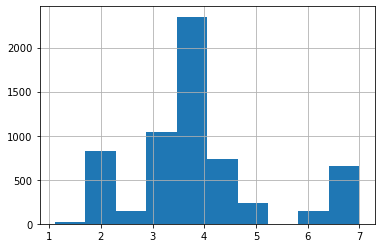

In [16]:
middle_df["growth_stage"].hist()

In [325]:
new_df[new_df["label_quality"] == 2][np.abs(new_df["pred"] - new_df["growth_stage"]) > 1]

<ipython-input-325-eff0e7768674>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df[new_df["label_quality"] == 2][np.abs(new_df["pred"] - new_df["growth_stage"]) > 1]


,UID,img_name,pred,std,label_quality,growth_stage
1258,7CTSsJMG,7CTSsJMG.jpeg,4.457197,0.154665,2,7
1466,8Swz7N9B,8Swz7N9B.jpeg,6.360164,0.277265,2,5
2239,Cu3Lc0Zb,Cu3Lc0Zb.jpeg,5.561393,0.343655,2,7
2244,CwVd90ak,CwVd90ak.jpeg,6.276688,0.275591,2,5
2249,CyhsQU3l,CyhsQU3l.jpeg,6.462969,0.132661,2,5
2469,EIQOCqPf,EIQOCqPf.jpeg,5.541780,0.481407,2,7
3089,HSqAI3so,HSqAI3so.jpeg,5.876505,0.657240,2,7
3311,IUSQeRHd,IUSQeRHd.jpeg,5.484331,0.407597,2,7
3359,ImXkG8PK,ImXkG8PK.jpeg,5.458125,0.729515,2,7
3697,KifXgACj,KifXgACj.jpeg,5.625969,0.774986,2,7


In [283]:
df[df["UID"] == "nxzMhSBl"]

,UID,growth_stage,label_quality,img_name,pred
2706,nxzMhSBl,1,2,nxzMhSBl.jpeg,1


In [13]:
test_df = pd.read_csv("test_data_rn34_01_2.csv")
columns = test_df.columns
pred = []
for g in test_df.groupby("UID"):
    p = g[1]["pred"]**2
    std = g[1]["pred"].std()
    #print(p)
    pred.append([g[1]["UID"].unique()[0], g[1]["img_name"].unique()[0], np.max(np.min([np.sqrt(p.mean()), 6]),0)+1, std])
test_df = pd.DataFrame(data = pred, columns = ["UID", "img_name", "pred", "std"])
test_df["img_name"] = test_df["UID"].apply(lambda x: ".".join([x, "jpeg"]))
test_df["label_quality"] = 3
test_df["pred"] 
test_df.head(10)

,UID,img_name,pred,std,label_quality
0,01nUuQaf,01nUuQaf.jpeg,1.952937,0.069155,3
1,02QNbFW3,02QNbFW3.jpeg,3.050277,0.105442,3
2,02l3WRi5,02l3WRi5.jpeg,3.783185,0.207745,3
3,02r3NCOn,02r3NCOn.jpeg,3.801278,0.089024,3
4,03DVBfql,03DVBfql.jpeg,2.415812,0.114986,3
5,03Wa4HYF,03Wa4HYF.jpeg,4.250384,0.184660,3
6,05fShdVk,05fShdVk.jpeg,2.825740,0.074401,3
7,073SXqRf,073SXqRf.jpeg,3.807354,0.143256,3
8,07JgRfux,07JgRfux.jpeg,4.412137,0.229030,3
9,07PKkdGp,07PKkdGp.jpeg,4.470440,0.276811,3


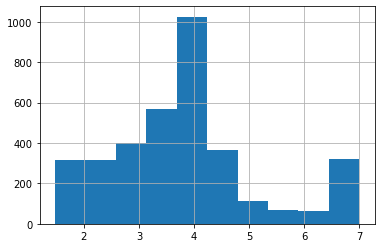

In [339]:
test_df["pred"].hist()

In [341]:
test_df.describe()

,pred,std,label_quality
count,3558.000000,3558.000000,3558.0
mean,3.826878,0.163288,3.0
std,1.317892,0.100315,0.0
min,1.473611,0.035987,3.0
25%,2.972896,0.100977,3.0
50%,3.791324,0.133554,3.0
75%,4.276354,0.186309,3.0
max,7.000000,0.907668,3.0


In [312]:
test_df[test_df["std"] < 0.15]

,UID,img_name,pred,std,label_quality
0,01nUuQaf,01nUuQaf.jpeg,1.952937,0.069155,3
1,02QNbFW3,02QNbFW3.jpeg,3.050277,0.105442,3
3,02r3NCOn,02r3NCOn.jpeg,3.801278,0.089024,3
4,03DVBfql,03DVBfql.jpeg,2.415812,0.114986,3
6,05fShdVk,05fShdVk.jpeg,2.825740,0.074401,3
...,...,...,...,...,...
3551,zsYJN8tm,zsYJN8tm.jpeg,2.941595,0.089676,3
3552,zt5g1j4Q,zt5g1j4Q.jpeg,6.522356,0.094121,3
3553,ztg4lqnL,ztg4lqnL.jpeg,4.073229,0.115172,3
3555,zuNA1VeI,zuNA1VeI.jpeg,3.821784,0.098683,3


In [290]:
df_st2.sort_values(["label_quality", "growth_stage", "pred"]).to_csv("inspect.csv")

In [18]:
def round_p(x):
    if np.abs(round(x) - x) < 0.1:
        return round(x)
    else: 
        return x
middle_df["growth_stage"] = middle_df["growth_stage"].apply(lambda x: round_p(x))

In [19]:
middle_df[["UID", "growth_stage", "img_name"]].to_csv("middle_rn34_wt.csv", index=False, header=["UID", "growth_stage", "img_name"])  #сделано из small 34 

In [280]:
middle_df.duplicated("img_name").sum()

0

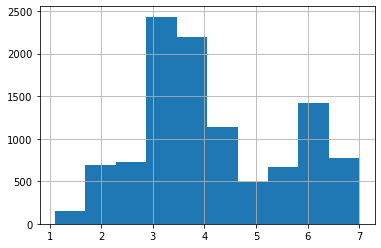

In [281]:
new_df["pred"].hist()

In [282]:
new_df[new_df["label_quality"] == 2][["UID", "pred"]].to_csv("pred_rn50_24.csv", columns=["UID", "pred"], index = False)